<a href="https://colab.research.google.com/github/Rohit-Saswadkar/Seoul_Bike_Sharing_Demand_Prediction/blob/main/1%5D_Bike_sharing_prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

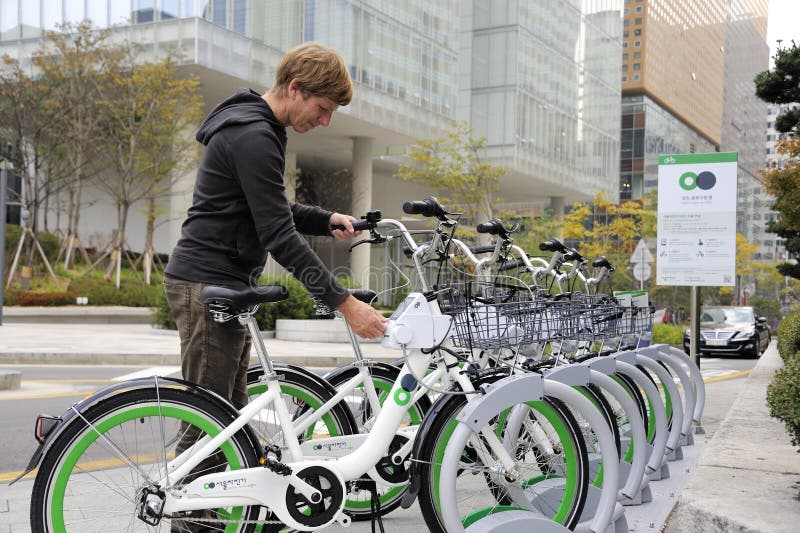


# **Project Title : Seoul Bike Sharing Demand Prediction**

### **Problem Description -**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


Data Description
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
Attribute Information:
*   List item
*   List item
*   List item
*   List item
*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour List item
*  Hour - Hour of he day
*   Temperature-Temperature in Celsius
*   Humidity - %
*   Windspeed - m/s
*   Visibility - 10m
*   Dew point temperature - Celsius
*   Solar radiation - MJ/m2
*   Rainfall - mm
*   Snowfall - cm
*   Seasons - Winter, Spring, Summer, Autumn
*   Holiday - Holiday/No holiday List item
*   Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours):

github link- https://github.com/Starfighter-rohit/Capstone-2/blob/main/capstone%202xxx


[link text](https://)
## **Loading Important Libraries**











In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV , KFold

import os
import pickle

from scipy.stats import boxcox , yeojohnson , zscore
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')

##**Loading Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_excel(r"/content/drive/MyDrive/Data Science Advanced Projects/capstones/capstone 2/seoul bike.xlsx")

##**Lets Dive the Data!**

In [5]:
# Heads and tails gets the initial view of the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12 00:00:00,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12 00:00:00,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12 00:00:00,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12 00:00:00,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12 00:00:00,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


##**Renaming the features**

In [7]:
# renaming the feature give proper understanding about features
df.rename(columns={'Rented Bike Count':'Bike_count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Functioning Day':'Functioning_Day','Wind speed (m/s)':'Wind','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temp','Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rain','Snowfall (cm)':'Snow'},inplace=True)

##**Lets do statistical analysis of the data**

In [8]:
# lets gets statistical anlysis of the data
df.describe()

,Bike_count,Hour,Temperature,Humidity,Wind,Visibility,Dew_point_temp,Solar_Radiation,Rain,Snow
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Lets check the data type and null counts of each feature**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Bike_count       8760 non-null   int64  
 2   Hour             8760 non-null   int64  
 3   Temperature      8760 non-null   float64
 4   Humidity         8760 non-null   int64  
 5   Wind             8760 non-null   float64
 6   Visibility       8760 non-null   int64  
 7   Dew_point_temp   8760 non-null   float64
 8   Solar_Radiation  8760 non-null   float64
 9   Rain             8760 non-null   float64
 10  Snow             8760 non-null   float64
 11  Seasons          8760 non-null   object 
 12  Holiday          8760 non-null   object 
 13  Functioning_Day  8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


##**Taking look on Unique value of each feature!**

In [10]:
df['Date'].value_counts()

30/11/2018             24
2017-01-12 00:00:00    24
2017-02-12 00:00:00    24
2017-03-12 00:00:00    24
2017-04-12 00:00:00    24
                       ..
17/12/2017             24
18/12/2017             24
19/12/2017             24
20/12/2017             24
21/12/2017             24
Name: Date, Length: 365, dtype: int64

In [11]:
df['Bike_count'].value_counts()

0       295
122      19
223      19
262      19
189      18
       ... 
2159      1
1692      1
894       1
793       1
1304      1
Name: Bike_count, Length: 2166, dtype: int64

In [12]:
df['Hour'].value_counts()

0     365
1     365
2     365
3     365
4     365
5     365
6     365
7     365
8     365
9     365
10    365
11    365
12    365
13    365
14    365
15    365
16    365
17    365
18    365
19    365
20    365
21    365
22    365
23    365
Name: Hour, dtype: int64

In [13]:
df['Temperature'].value_counts()

 19.1    40
 20.5    40
 23.4    39
 20.7    38
 7.6     38
         ..
-17.4     1
-13.5     1
-13.6     1
-13.9     1
 36.9     1
Name: Temperature, Length: 546, dtype: int64

In [14]:
df['Humidity'].value_counts()

97    173
53    173
43    164
57    159
56    157
     ... 
19     11
13      3
12      1
10      1
11      1
Name: Humidity, Length: 90, dtype: int64

In [15]:
df['Wind'].value_counts()

1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.4      1
6.9      1
6.1      1
6.7      1
5.7      1
Name: Wind, Length: 65, dtype: int64

In [16]:
df['Visibility'].value_counts()

2000    2245
1995      34
1989      28
1985      28
1999      28
        ... 
1579       1
1116       1
1198       1
757        1
285        1
Name: Visibility, Length: 1789, dtype: int64

In [17]:
df['Dew_point_temp'].value_counts()

 0.0     60
 21.1    43
 14.3    40
 21.2    40
 8.9     39
         ..
-29.2     1
-27.8     1
-26.8     1
 26.3     1
 25.9     1
Name: Dew_point_temp, Length: 556, dtype: int64

In [18]:
df['Solar_Radiation'].value_counts()

0.00    4300
0.01     128
0.02      82
0.03      69
0.06      61
        ... 
3.49       1
2.97       1
3.35       1
3.38       1
3.45       1
Name: Solar_Radiation, Length: 345, dtype: int64

In [19]:
df['Snow'].value_counts()

0.0    8317
0.3      42
1.0      39
0.5      34
0.9      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
1.3       4
3.2       4
4.1       4
4.0       4
2.1       3
1.1       3
2.3       3
3.3       3
3.8       3
3.7       3
2.4       3
1.7       3
1.9       3
0.1       2
3.9       2
2.9       2
1.4       2
4.3       2
5.0       2
8.8       2
2.8       2
4.8       2
3.4       2
3.1       1
4.2       1
5.1       1
1.5       1
7.1       1
7.0       1
6.0       1
3.6       1
Name: Snow, dtype: int64

In [20]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [21]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [22]:
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [23]:
df['Bike_count'].value_counts()

0       295
122      19
223      19
262      19
189      18
       ... 
2159      1
1692      1
894       1
793       1
1304      1
Name: Bike_count, Length: 2166, dtype: int64

##**Extracting and Transforming Categorical Features with One-Hot Encoding**

conclusion - temperature , humidity , wind , visibility , dew point temp values are arond zero so its good. But for remaining i have to experiment some box cox or log transformations

**1] Create new features from date such as day , month , year**

In [24]:
# convert date from object to datetime
df['Date']=pd.to_datetime(df['Date'])


df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

df.drop(columns=['Date'],inplace=True)

**2] Convert Holiday and Functionig day to binary.**

In [25]:
df.columns

Index(['Bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind', 'Visibility',
       'Dew_point_temp', 'Solar_Radiation', 'Rain', 'Snow', 'Seasons',
       'Holiday', 'Functioning_Day', 'Day', 'Month', 'Year'],
      dtype='object')

In [26]:
# create object columns to binary using one hot encoding

df['Holiday']=np.where(df['Holiday']=='Holiday',1,0)

df['Functioning_Day']=np.where(df['Functioning_Day']=='Yes',1,0)

#check encoding
print(df['Functioning_Day'].value_counts())


1    8465
0     295
Name: Functioning_Day, dtype: int64


**3] Applying one hot encoding on Seasons**

In [27]:
# check values of seasons which will helpful to drop the 1 column to reduce multicolinearity
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [28]:
# After One Hot encoding I have to drop 1 feature from that to avoid multicollinearity. But for that instead random dropping I am going to drop feature after checking EDA
df = pd.get_dummies( df , columns = ['Seasons']  , prefix = 'Season')

**Checking the columns after processing**

In [29]:
df.columns

Index(['Bike_count', 'Hour', 'Temperature', 'Humidity', 'Wind', 'Visibility',
       'Dew_point_temp', 'Solar_Radiation', 'Rain', 'Snow', 'Holiday',
       'Functioning_Day', 'Day', 'Month', 'Year', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')

**Sort out the categorical and numerical data**

In [30]:
# Now sort out the features as per there data -  numerical , categorical etc.
numerical_data = ['Bike_count', 'Temperature', 'Humidity', 'Wind','Visibility', 'Dew_point_temp', 'Solar_Radiation', 'Rain', 'Snow']

categorical_data = ['Season_Autumn','Season_Spring', 'Season_Summer', 'Season_Winter','Holiday','Functioning_Day' , 'Day','Month','Year','Hour']

##**Let's Explore the data using Exploratory Data Analysis**

###**1] Univariate Analysis**

**1] Check Distribution of the data-**


In [31]:
def Distribution_plot(data):
  for col in data:
    df[col].plot(kind = 'kde')
    plt.title(f"Distribution of {col}")
    plt.show()

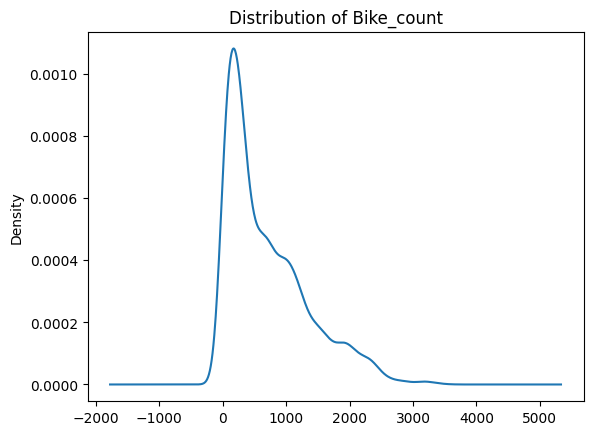

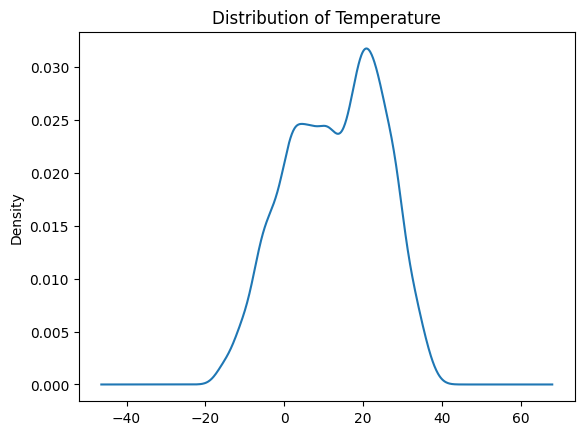

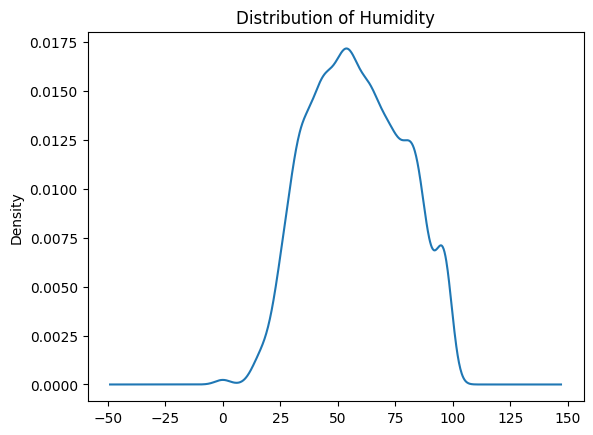

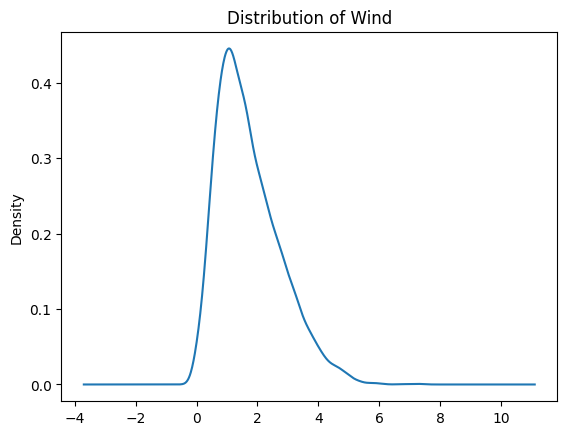

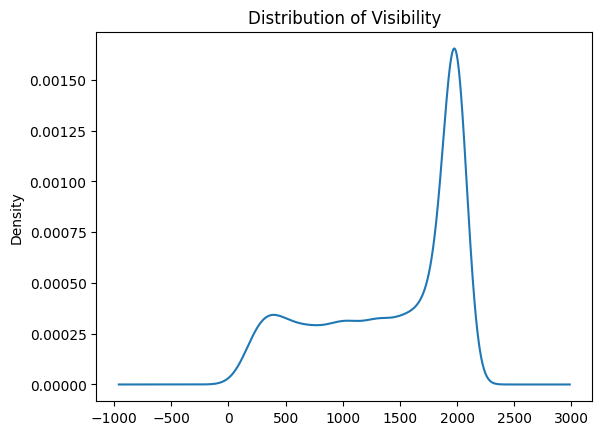

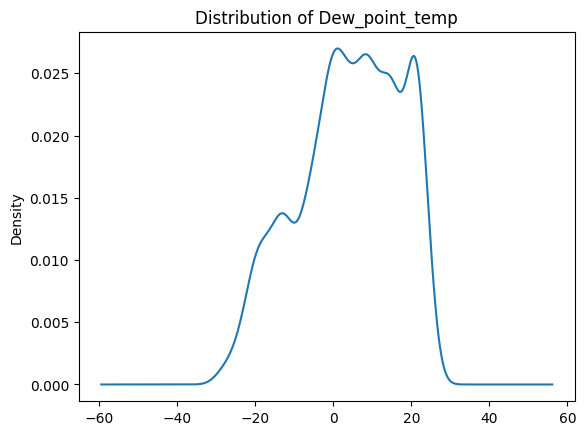

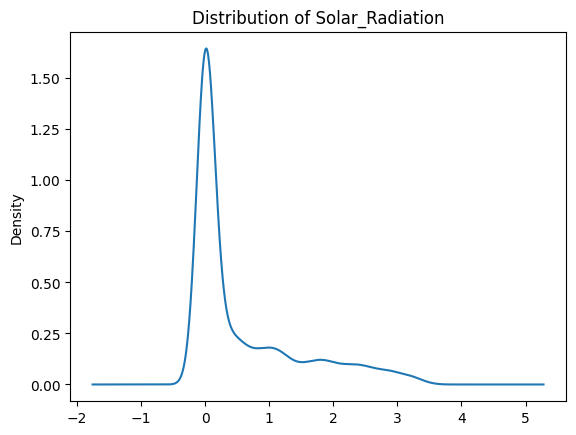

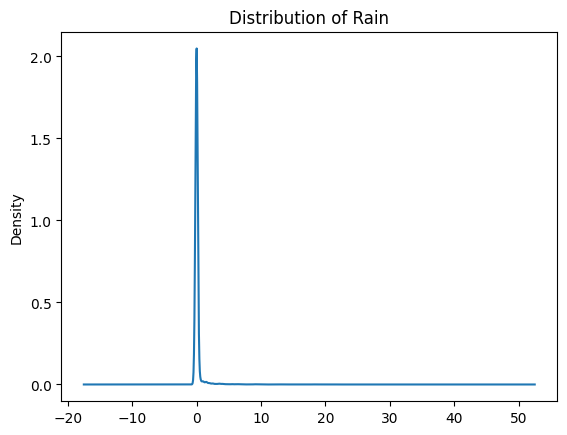

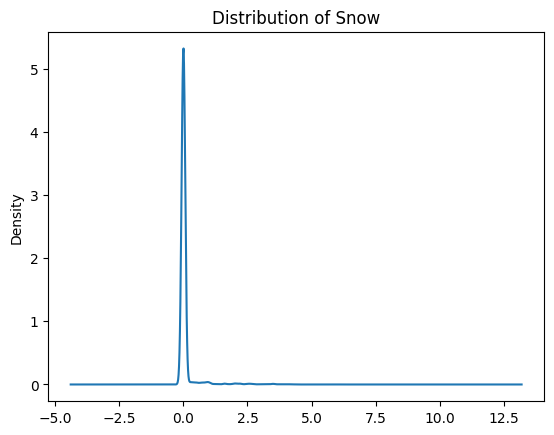

In [32]:
Distribution_plot(numerical_data)

###**As per above, many feaures are have skewness. Lets check skewness value of the feature and are there any outliers**

In [33]:
df.skew()

Bike_count          1.153428
Hour                0.000000
Temperature        -0.198326
Humidity            0.059579
Wind                0.890955
Visibility         -0.701786
Dew_point_temp     -0.367298
Solar_Radiation     1.504040
Rain               14.533232
Snow                8.440801
Holiday             4.163603
Functioning_Day    -5.170969
Day                 0.007522
Month              -0.010458
Year               -2.978262
Season_Autumn       1.159123
Season_Spring       1.142294
Season_Summer       1.142294
Season_Winter       1.176139
dtype: float64

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(df, columns):
    num_columns = len(columns)
    num_rows = 2
    num_cols_per_row = num_columns // num_rows + (num_columns % num_rows > 0)

    # Set the size of the plot
    plt.figure(figsize=(12, 6))

    # Iterate through each column and create a boxplot
    for i, col in enumerate(columns, 1):
        plt.subplot(num_rows, num_cols_per_row, i)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

    # Adjust layout for better visibility
    plt.tight_layout()
    plt.show()

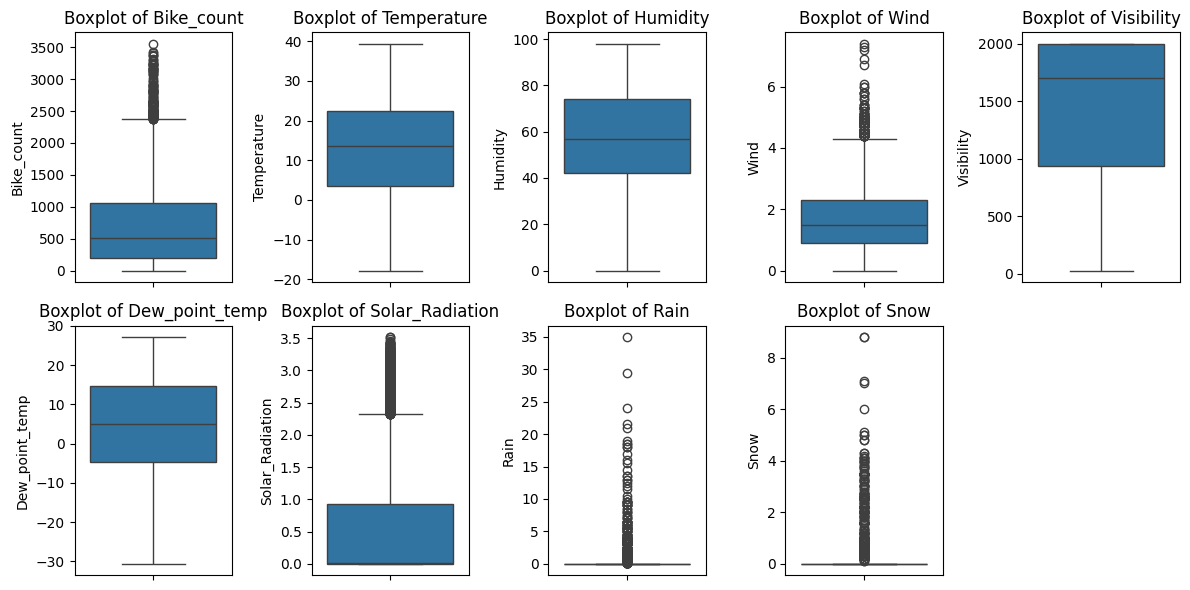

In [35]:
plot_boxplots(df ,numerical_data )

problem Faced - As per above plots Bike count , wind , solar radiation , rain and snow has too much outliers which will effect the moels performance.

In [36]:
import numpy as np
import pandas as pd

def remove_outliers(df, cols):
    outliers_count = {}  # Initialize a dictionary to store outliers count for each feature

    for col in cols:
        median = df[col].median()
        mad = df[col].mad()

        lower_limit = median - 3 * mad
        upper_limit = median + 3 * mad

        # Count outliers and replace values
        outliers = ((df[col] < lower_limit) | (df[col] > upper_limit))
        df[col] = np.where( df[col] < lower_limit , lower_limit , df[col])
        df[col] = np.where( df[col] > upper_limit , upper_limit , df[col])
        outliers_count[col] = outliers.sum()

        # df[col] = np.where(outliers, median, df[col])

    print("Outliers count for each feature:")
    for col, count in outliers_count.items():
        print(f"{col}: {count}")

    return df

# Assuming df is your DataFrame and cols contains the columns where you want to remove outliers
cols_to_remove_outliers = ['Bike_count', 'Wind', 'Solar_Radiation', 'Rain', 'Snow']
df = remove_outliers(df, cols_to_remove_outliers)


Outliers count for each feature:
Bike_count: 418
Wind: 306
Solar_Radiation: 840
Rain: 317
Snow: 363


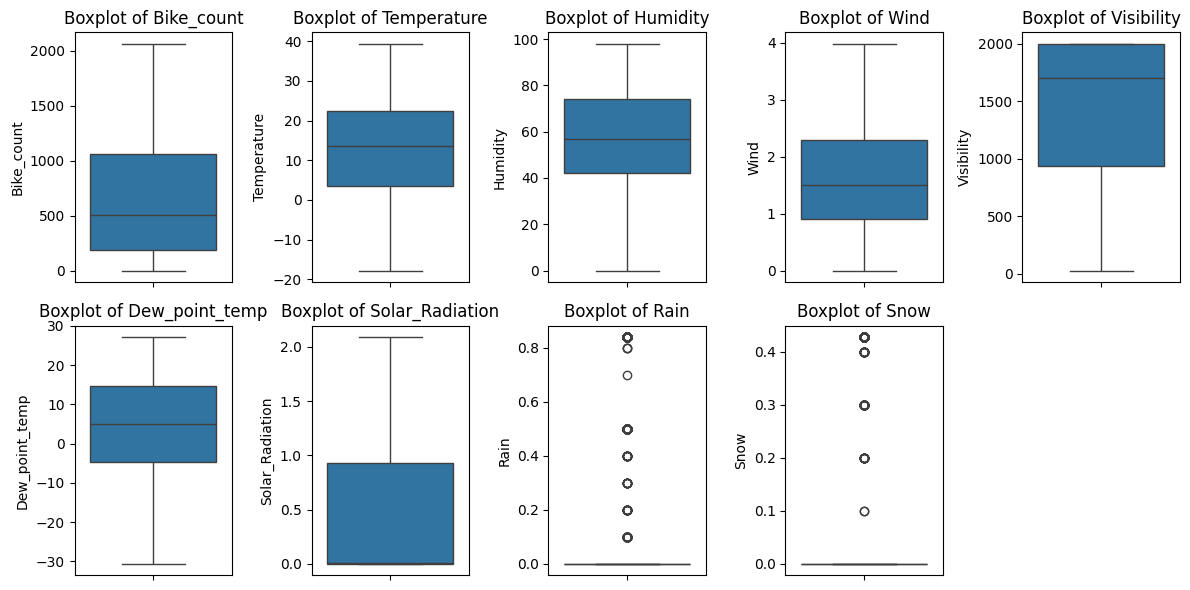

In [37]:
plot_boxplots(df , numerical_data)

**Skewed Data - **
Bike count , solar radiation , Rain , Snow , Holiday, functioning day amd Year shown Skewness. Lets do some Transformation on that

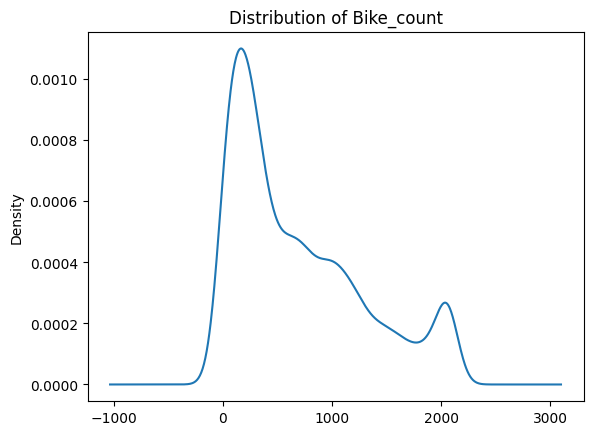

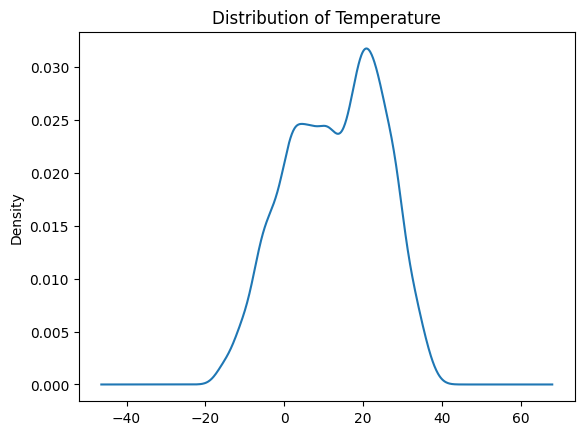

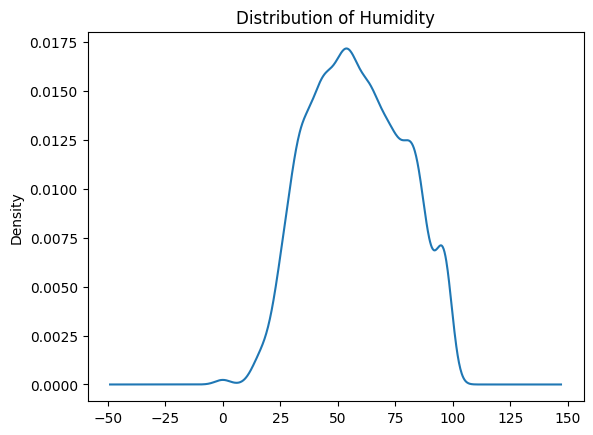

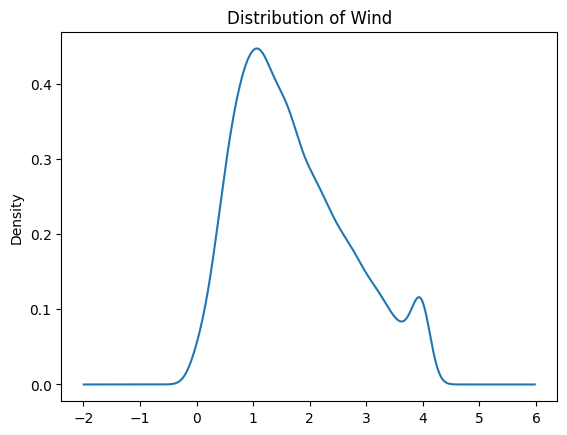

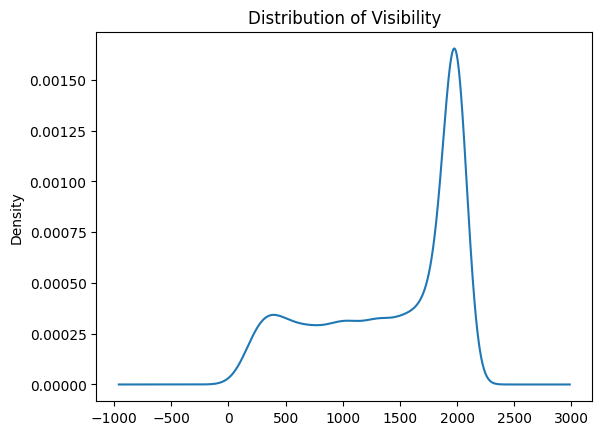

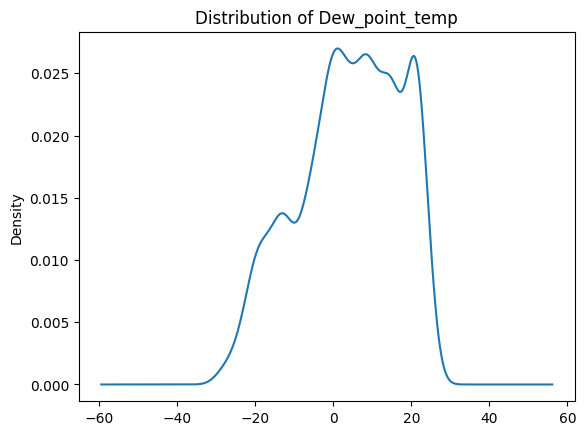

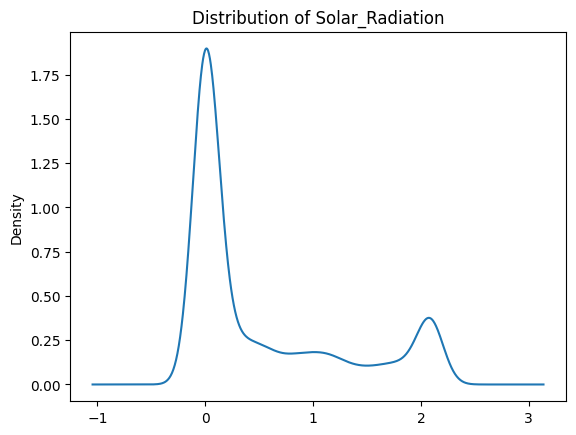

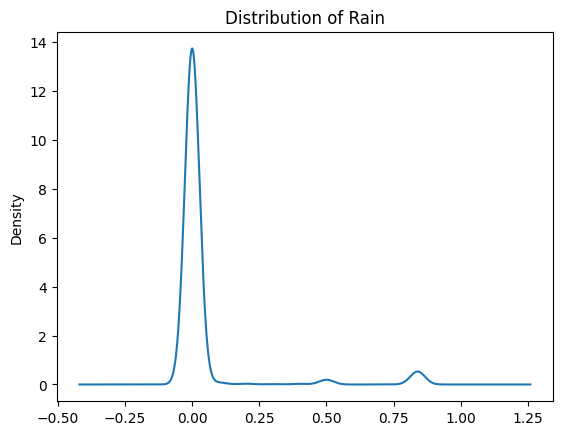

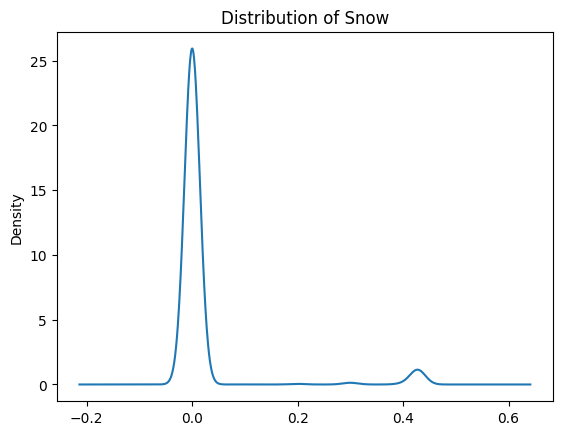

In [38]:
Distribution_plot(numerical_data)

In [39]:
df.skew()

Bike_count         0.868953
Hour               0.000000
Temperature       -0.198326
Humidity           0.059579
Wind               0.609190
Visibility        -0.701786
Dew_point_temp    -0.367298
Solar_Radiation    1.177552
Rain               4.269664
Snow               4.206632
Holiday            4.163603
Functioning_Day   -5.170969
Day                0.007522
Month             -0.010458
Year              -2.978262
Season_Autumn      1.159123
Season_Spring      1.142294
Season_Summer      1.142294
Season_Winter      1.176139
dtype: float64

In [40]:
positively_skewed_data = ['Solar_Radiation','Rain','Snow' ]

##**Check outliers the Liers:**

In [41]:
def log_trans(df , data):
  for col in data:
    df[col] = np.log(df[col] + 1)
    df[col] = np.sqrt(df[col])
    df[col] = np.cbrt(df[col])
  return df

In [42]:
df = log_trans( df , positively_skewed_data)

In [43]:
df.skew()

Bike_count         0.868953
Hour               0.000000
Temperature       -0.198326
Humidity           0.059579
Wind               0.609190
Visibility        -0.701786
Dew_point_temp    -0.367298
Solar_Radiation    0.108663
Rain               3.738645
Snow               4.107642
Holiday            4.163603
Functioning_Day   -5.170969
Day                0.007522
Month             -0.010458
Year              -2.978262
Season_Autumn      1.159123
Season_Spring      1.142294
Season_Summer      1.142294
Season_Winter      1.176139
dtype: float64

**Following various transformations such as square root, cube root, log, and boxcox, the skewness of features like rain, snow, and holiday was reduced, with boxcox proving to be the most effective.**

###2] Bivariate Analysis -
Analyse the relationship of each Feature with Target variable that is Bike Count

**B] Relationship of Categorical Data to Bike count**

Mean of independent variable with rented bike count
Season_Autumn vs bike_count


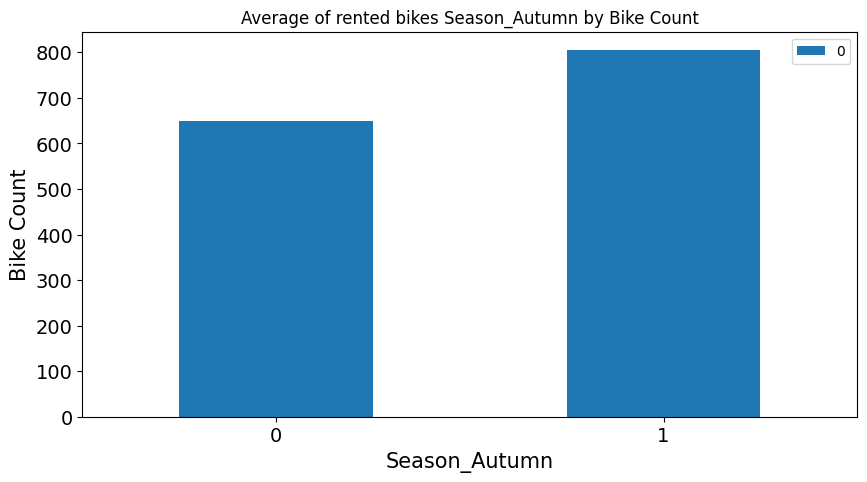

Season_Spring vs bike_count


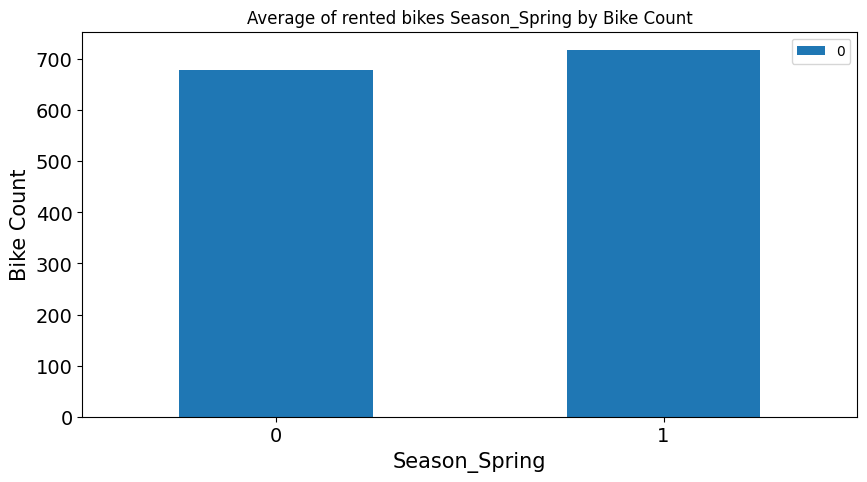

Season_Summer vs bike_count


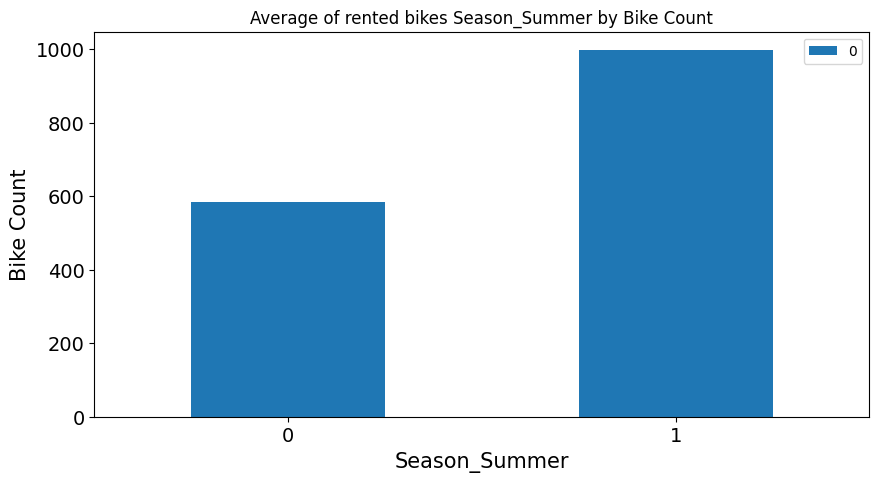

Season_Winter vs bike_count


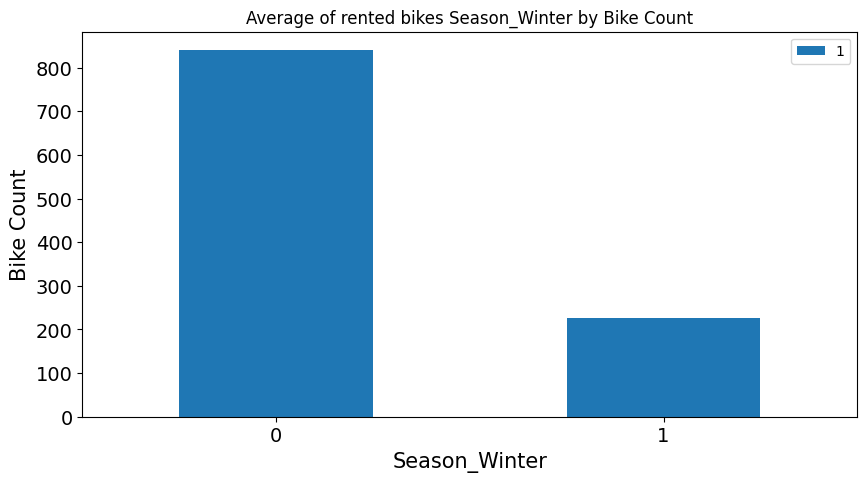

Holiday vs bike_count


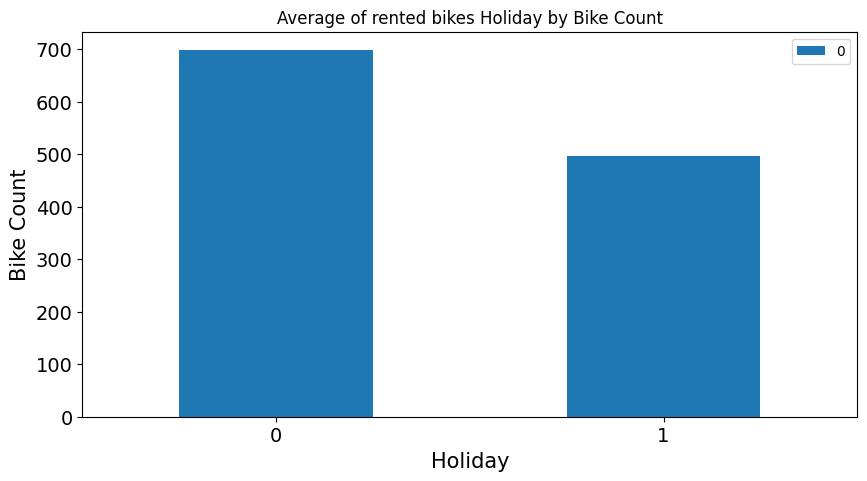

Functioning_Day vs bike_count


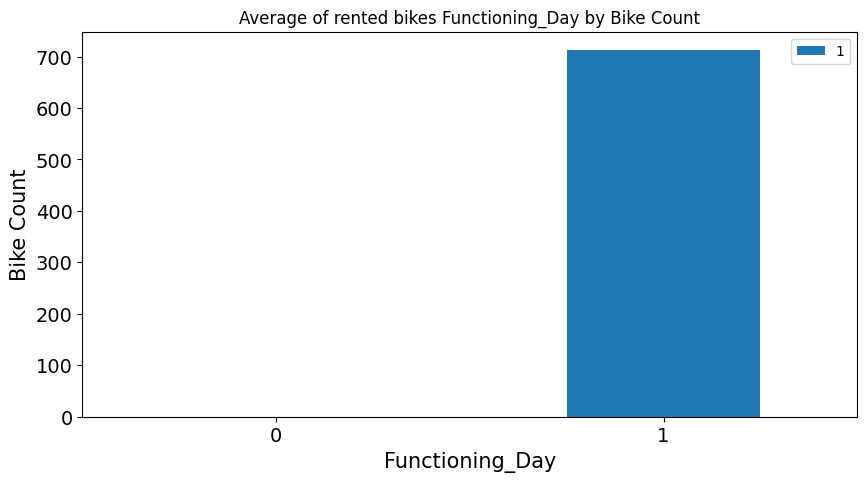

Day vs bike_count


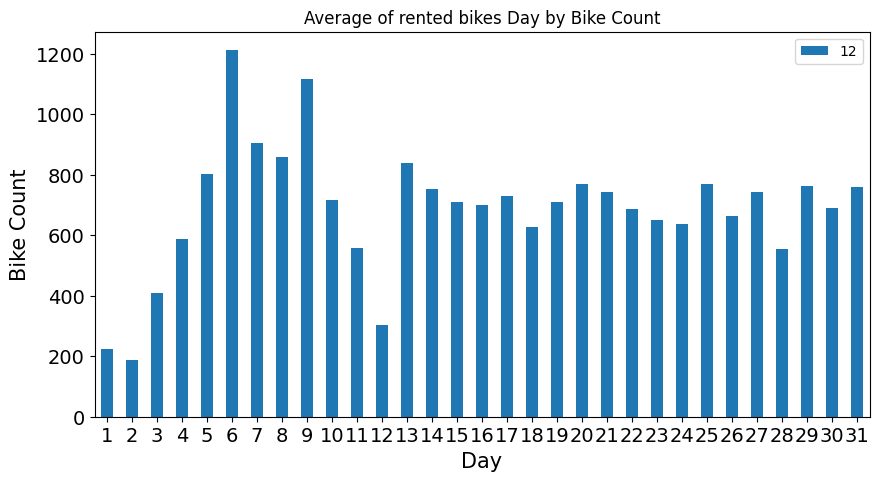

Month vs bike_count


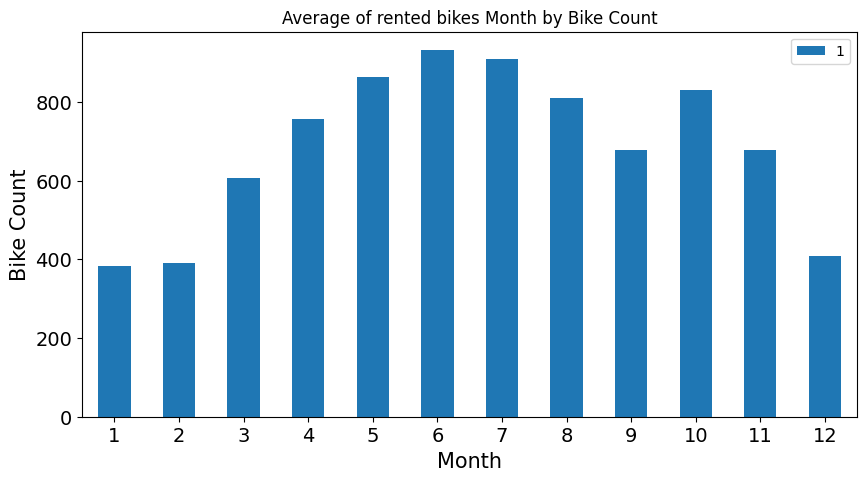

Year vs bike_count


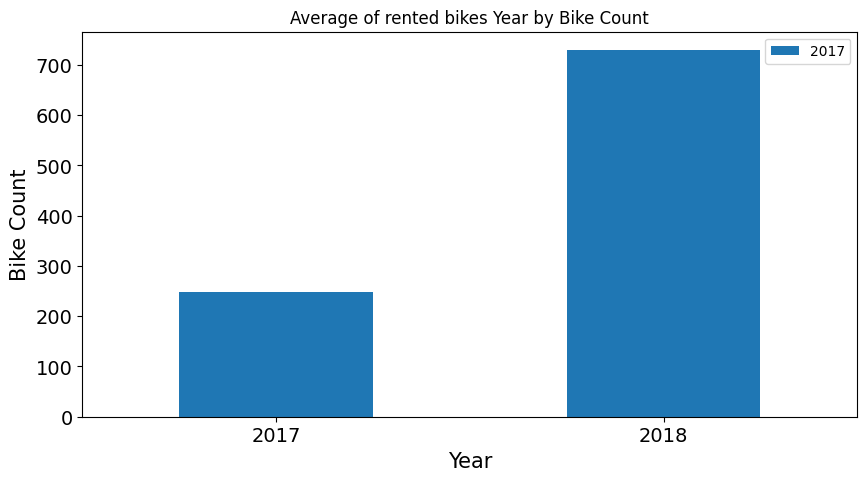

Hour vs bike_count


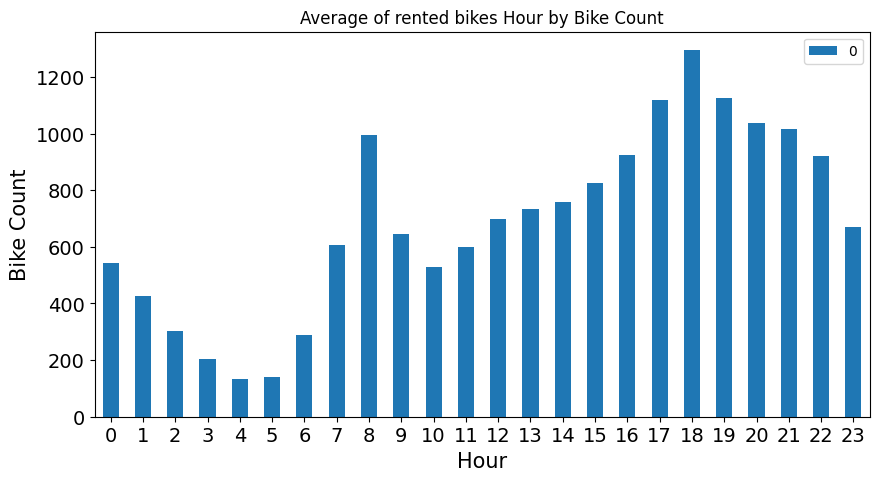

In [44]:
# bar graph for Mean of independent variable with rented bike count
print('Mean of independent variable with rented bike count')
for col in categorical_data:
    print(f'{col} vs bike_count')
    ax = df.groupby([col])['Bike_count'].mean().plot.bar(figsize=(10, 5), fontsize=14)
    ax.set_title(f'Average of rented bikes {col} by Bike Count')
    ax.set_xlabel(col, fontsize=15)
    ax.set_ylabel('Bike Count', fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.legend(df[col])
    plt.show()
    plt.close()



**Conclusion-**

1. **Peak Hours:** Bike rentals are highest during working days, especially during morning rush hours (7 AM to 9 AM) and evening rush hours (4 PM to 8 PM). This trend indicates significant usage by office workers and students.

2. **Seasonal Impact:** The demand for bike rentals is influenced by the seasons, with the highest counts observed during the transition from summer to rainy seasons. Notably, there is a decline in winter, possibly due to South Korea's low temperatures during this period, leading to a preference for cars or buses.

3. **Weather Influence:** The analysis suggests a positive correlation between bike rentals and favorable weather conditions. Seasons like spring and autumn exhibit similar bike sharing patterns, reflecting a consistent demand throughout these transitional weather periods.

These insights can guide bike-sharing service providers in optimizing resources, marketing strategies, and operational planning to meet the varying demands influenced by time, seasons, and weather conditions.

**B] Relationship of Numerical data to Bike counts**

In [45]:
# to check relationship betn dependent and independent variables
def scatterPlots(data):
  data.remove('Bike_count')
  for col in data :
    plt.scatter(df[col] , df['Bike_count'])
    plt.xlabel(col)
    plt.ylabel('Bike count')
    plt.show()

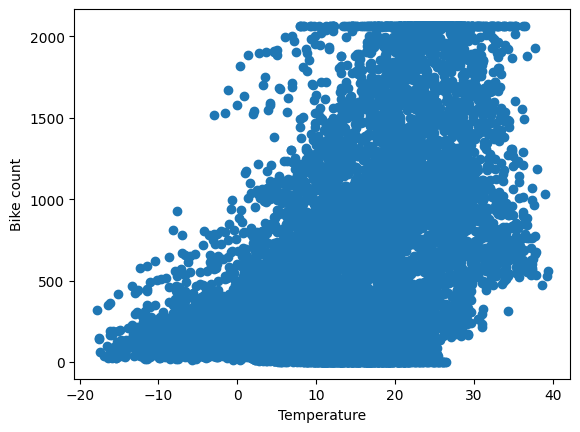

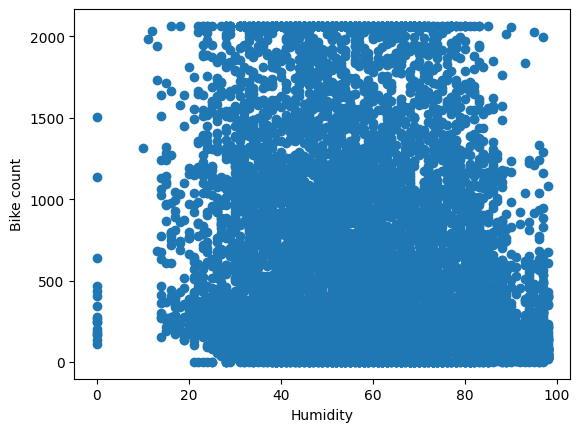

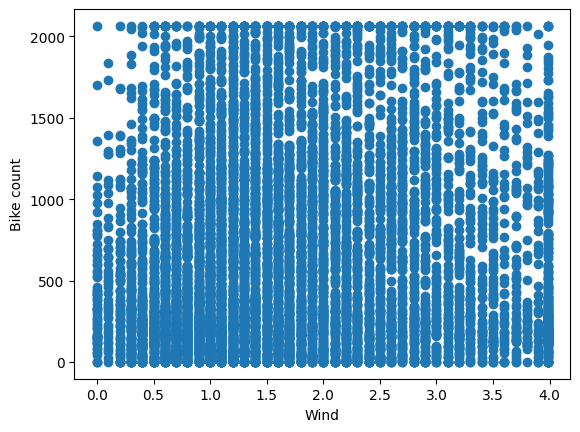

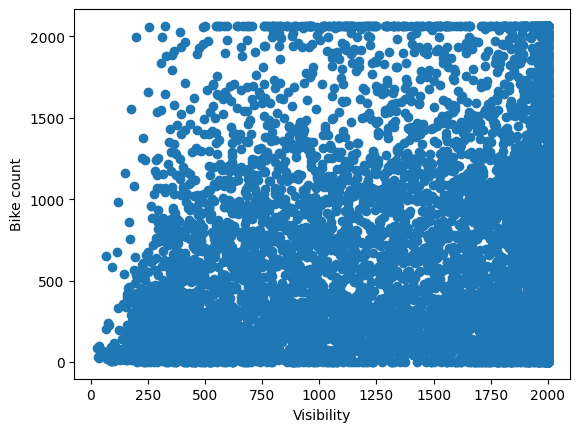

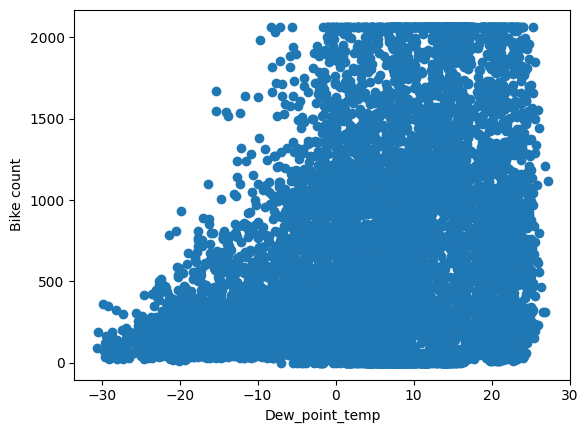

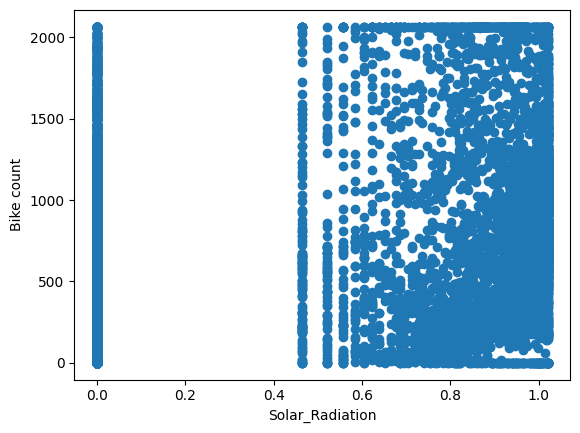

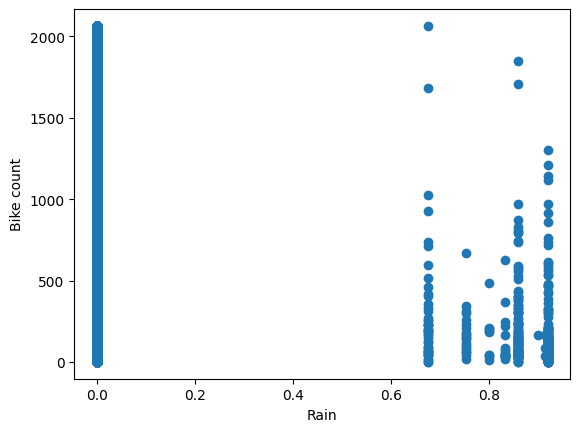

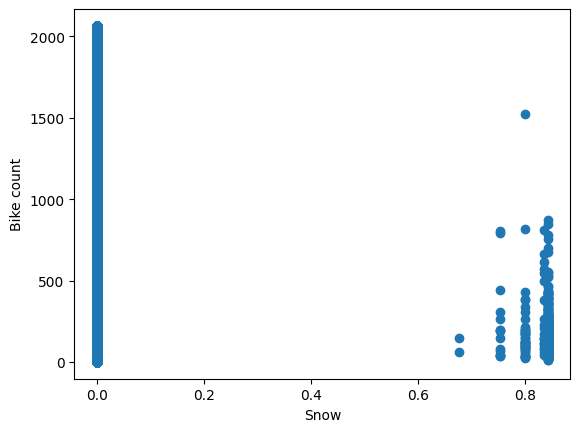

In [46]:
scatterPlots(numerical_data)

**Conclusion:**
1. **Temperature Impact:** The analysis indicates a positive correlation between temperature and bike rentals. Higher temperatures lead to increased bike demand, especially during office and school timings. This suggests that weather conditions play a crucial role in influencing user behavior.

2. **Weather Elements:** Both snow and rain show a negative impact on bike counts. An increase in snow or rain is associated with a decrease in bike rentals. This highlights the significance of considering adverse weather conditions in predicting and managing bike-sharing demand.

These findings emphasize the importance of factoring in weather-related variables for accurate demand forecasting and operational planning in the bike-sharing service. It allows service providers to adapt strategies based on temperature and weather conditions, ensuring optimal service availability and user satisfaction.

###**3] Multivariate analysis**

In [47]:
df['Functioning_Day'].value_counts()

1    8465
0     295
Name: Functioning_Day, dtype: int64

In [48]:
def heatmap(data):
  plt.figure(figsize=(16,8))
  plot=sns.heatmap(abs(data.corr()), annot=True, cmap='coolwarm')
  plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
  plt.show()


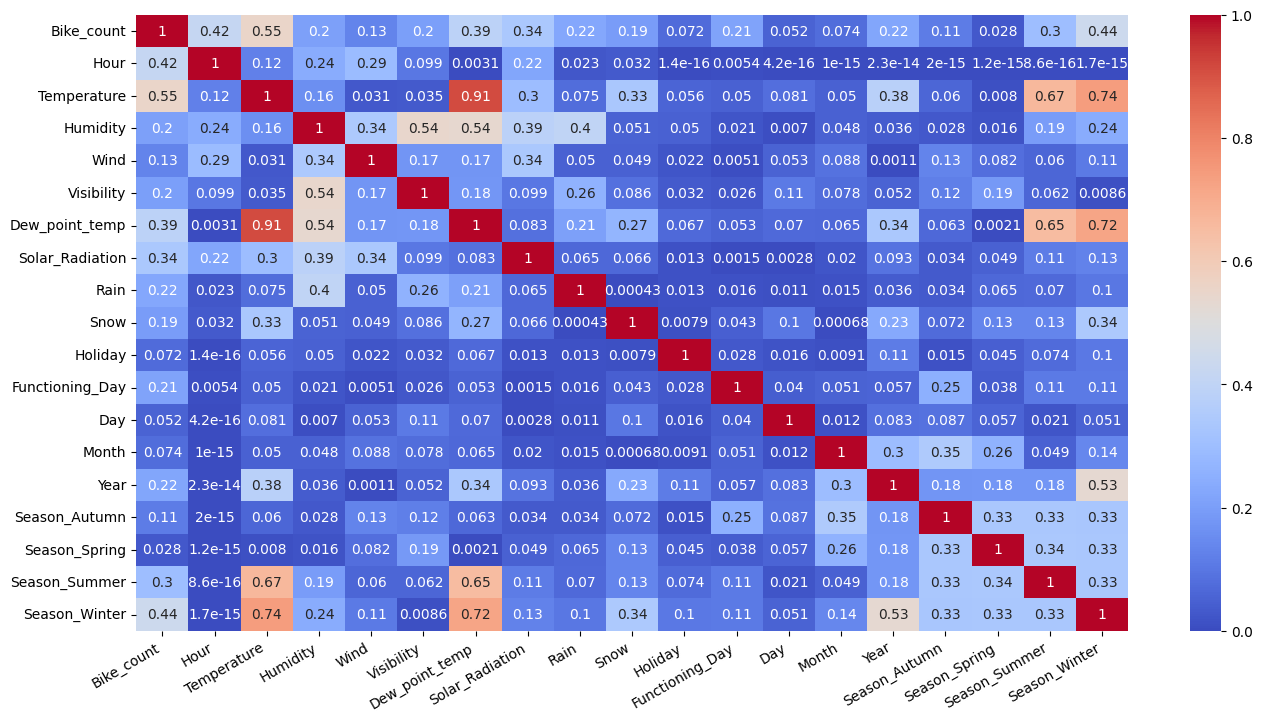

In [49]:
heatmap(df)

**A] Conclusion:**
1. **Winter Impact:** The observed high relationship between bike count and winter might be influenced by the limited dataset, as it only includes the winter season for the year 2017. Further analysis with additional data across all seasons would provide a more comprehensive understanding.

2. **Seasonal Variables:** Summer, dewpoint temperature, temperature, and hour exhibit notable relationships with bike counts. These variables likely contribute to the fluctuations in bike demand, indicating the need for a thorough analysis across different seasons for more accurate insights.

In summary, while the current findings highlight certain associations, a more extensive dataset spanning multiple years and seasons would enhance the robustness of the conclusions drawn from the analysis.

**B] Multicollinearity Analysis:**

1. **Temperature:** Demonstrates multicollinearity with summer, winter, and dewpoint temperature.

2. **Humidity:** Exhibits correlations with visibility, dewpoint, and solar radiation.

3. **Dewpoint:** Shows associations with both summer and winter.

Addressing these multicollinearity challenges requires strategic experimentation to enhance the robustness and precision of our analytical models.

**Handling Multicolinearity**


**1] Explore temperature's correlation with both summer and dew point temperature to unveil their interconnections.**

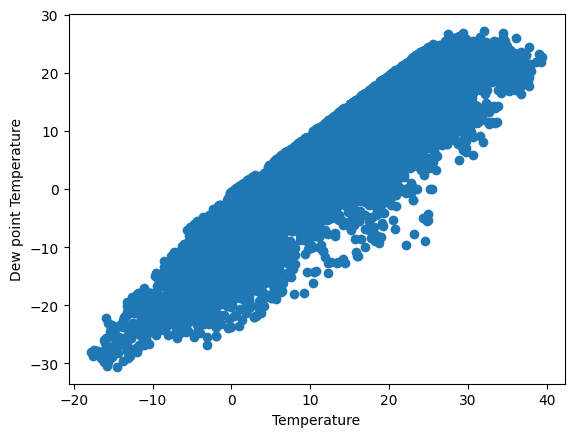

In [50]:
plt.scatter(df['Temperature'] , df['Dew_point_temp'])
plt.xlabel('Temperature')
plt.ylabel('Dew point Temperature')
plt.show()

**Its relevant that tempereature will higher in summer , so cross check the data**

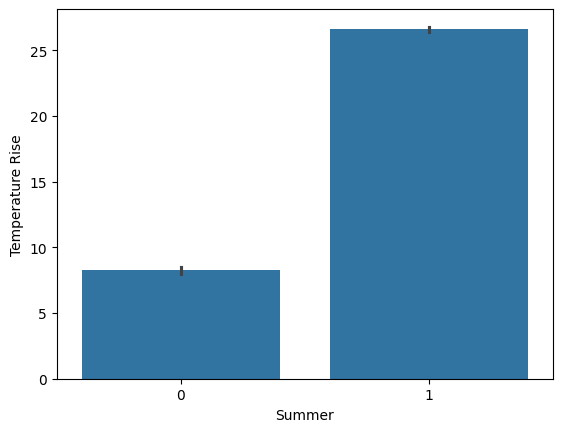

In [51]:
sns.barplot( x = 'Season_Summer' , y = 'Temperature' , data = df)
plt.xlabel('Summer')
plt.ylabel('Temperature Rise')
plt.show()

**Temperature abd dew point temperature are positively correlated so lets merge them with summer to reduce multicollinearity**

In [52]:
# Feature engineering
df['Temperature'] = df['Temperature'] + df['Dew_point_temp'] + df['Season_Summer']

In [53]:
# Now Winter season removed to tackle the multicolinearity after One Hot Encoding
df = df.drop(columns=['Dew_point_temp','Season_Summer', 'Season_Winter' , 'Year'])

**Plot Heatmap**


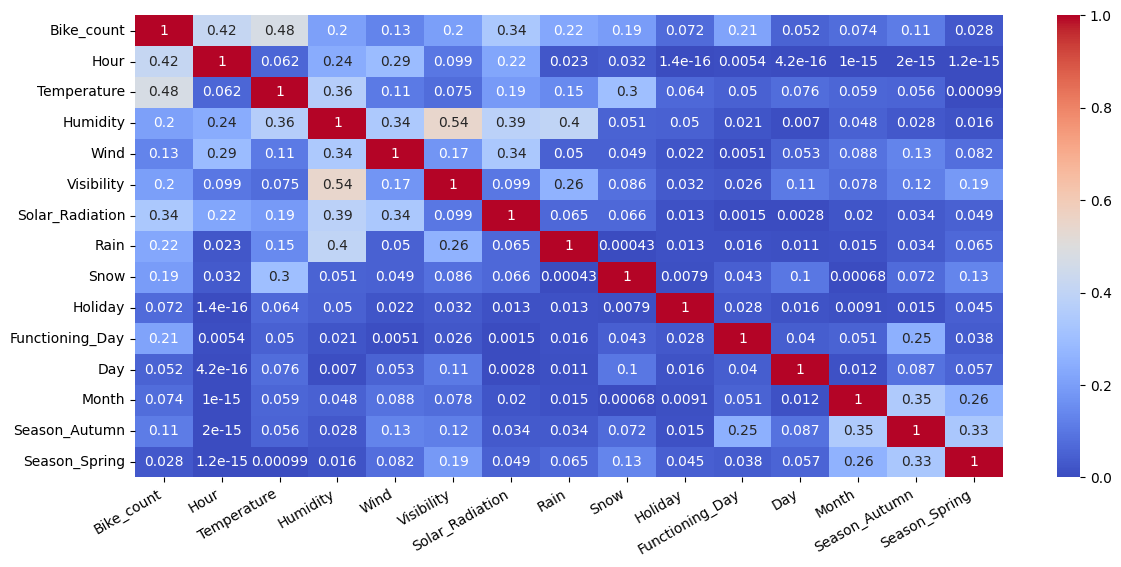

In [54]:
# checking multi colinearity after removal of unnecessary features
plt.figure(figsize=(14,6))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

Now Our multicolinarity is almost reduced . Now we are going to check vif

**Check VIF**


*   vif - variance inflation factor is used to determine strength of corelation between variable to other variables. It is by taking the variable and getting the regression of it against every other variables. VIF score of independent variable represents how well the variable is explained by other independent variable.



In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    # Convert the DataFrame to numeric type
    # df = df.apply(pd.to_numeric, errors='coerce')

    # Drop columns with missing values after conversion
    df = df.dropna(axis=1)

    # Create a DataFrame to store the results
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return vif_data

# Assuming 'df' is your DataFrame with the columns of interest
vif_result = calculate_vif(df)
print(vif_result)


           Variable        VIF
0        Bike_count   5.581066
1              Hour   4.896054
2       Temperature   3.611634
3          Humidity  15.572497
4              Wind   5.070938
5        Visibility   7.308182
6   Solar_Radiation   2.793674
7              Rain   1.363629
8              Snow   1.287822
9           Holiday   1.063849
10  Functioning_Day  25.811653
11              Day   4.210502
12            Month   5.295622
13    Season_Autumn   1.883456
14    Season_Spring   1.618946


In [56]:
df.head()

,Bike_count,Hour,Temperature,Humidity,Wind,Visibility,Solar_Radiation,Rain,Snow,Holiday,Functioning_Day,Day,Month,Season_Autumn,Season_Spring
0,254.0,0,-22.8,37,2.2,2000,0.0,0.0,0.0,0,1,12,1,0,0
1,204.0,1,-23.1,38,0.8,2000,0.0,0.0,0.0,0,1,12,1,0,0
2,173.0,2,-23.7,39,1.0,2000,0.0,0.0,0.0,0,1,12,1,0,0
3,107.0,3,-23.8,40,0.9,2000,0.0,0.0,0.0,0,1,12,1,0,0
4,78.0,4,-24.6,36,2.3,2000,0.0,0.0,0.0,0,1,12,1,0,0


In [57]:
# Check correlation matrix
correlation_matrix = df.corr()

# Print correlation with 'functioning day'
print(correlation_matrix['Functioning_Day'].sort_values(ascending=False))

# If 'functioning day' is highly correlated with another feature, consider dropping it
# For example, if 'A' is highly correlated with 'functioning day'
# df = df.drop('A', axis=1)


Functioning_Day    1.000000
Bike_count         0.213524
Snow               0.043068
Day                0.040256
Season_Spring      0.038413
Rain               0.015500
Hour               0.005439
Wind               0.005117
Solar_Radiation    0.001522
Humidity          -0.020800
Visibility        -0.026000
Holiday           -0.027624
Temperature       -0.050194
Month             -0.050807
Season_Autumn     -0.253718
Name: Functioning_Day, dtype: float64


#**Let's Start Model Building**




**1] Separating the Independent and ddependent variables**

In [58]:
# separating the Independent and ddependent variables
X=df.drop(['Bike_count'],axis=1)
y=df['Bike_count']

**2] Split the data into Train and Test**

In [59]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split( X , y , test_size=0.2, random_state=1)

**3] Scale the data - scaling after train test prevents data leakage**

In [60]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform( X_train)

x_test_scaled = scaler.fit_transform( X_test)

In [61]:
# Providing the range of values for hyperparameters such as Number of trees
n_estimators = [50,100,150]

# Maximum depth of trees:
max_depth = [5,8,10]

# Minimum number of samples required to split a node:
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [40,50]

# Learning rate:
eta = [0.05,0.08,0.1]

In [62]:

# check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_train_scaled, i) for i in range(x_train_scaled.shape[1])]
print(vif)


[1.1662149227807308, 1.7180168079892717, 2.865123047862679, 1.3114197241490828, 1.6780420470740451, 1.5797793534493723, 1.231864388959576, 1.229916764534077, 1.0111612001079058, 1.0795391401971945, 1.074444175210979, 1.1805446940782802, 1.3642662929977072, 1.243708151826668]


#Model

**1] Using Linear regression**

In [63]:
# Without regularization
from sklearn.linear_model import LogisticRegression

model = LinearRegression()

model.fit( x_train_scaled , y_train)

# With Regularization

reg_model = LinearRegression(fit_intercept = False)

reg_model.fit(x_train_scaled , y_train)



# With Intercept get prediction on train data
y_train_pred = model.predict(x_train_scaled)

train_mse = mean_squared_error( y_train , y_train_pred)

train_rmse = np.sqrt(train_mse)

r2_scores_train = r2_score(y_train , y_train_pred)

# get prediction on train data
y_test_pred = model.predict(x_test_scaled)

test_mse = mean_squared_error( y_test , y_test_pred)

test_rmse = np.sqrt(test_mse)

r2_scores_test = r2_score(y_test , y_test_pred)

# Without Intercept get prediction on train data
y_train_pred_int = reg_model.predict(x_train_scaled)

train_mse_int = mean_squared_error( y_train , y_train_pred_int)

train_rmse_int = np.sqrt(train_mse_int)

r2_scores_train_int = r2_score(y_train , y_train_pred_int)

# get prediction on train data
y_test_pred_int = model.predict(x_test_scaled)

test_mse_int = mean_squared_error( y_test , y_test_pred_int)

test_rmse_int = np.sqrt(test_mse_int)

r2_scores_test_int = r2_score(y_test , y_test_pred_int)


print("Linear regression with Intercept:")
print('Train data RMSE :', train_rmse)
print('Test data RMSE :', test_rmse)
print('Train R2:',r2_scores_train)
print('Test R2: ',r2_scores_test)

print("Linear regression without Intercept:")
print('Train data RMSE :', train_rmse_int)
print('Test data RMSE :', test_rmse_int)
print('Train R2:',r2_scores_train_int)
print('Test R2: ',r2_scores_test_int)

Linear regression with Intercept:
Train data RMSE : 382.39348426180914
Test data RMSE : 383.5654376443957
Train R2: 0.5985893911027189
Test R2:  0.5860271624895569
Linear regression without Intercept:
Train data RMSE : 786.6738721041205
Test data RMSE : 383.5654376443957
Train R2: -0.6988589848981095
Test R2:  0.5860271624895569


Observations:

RMSE:
Train data RMSE is significantly lower for the model with intercept (382.39 vs. 786.67).
Test data RMSE remains similar for both models (around 383.57).
R-squared:
Train R-squared is positive and notably higher for the model with intercept (0.5986 vs. -0.6989).
Test data R-squared remains similar for both models (around 0.5860).

Conclusion:
Given that our data exhibits non-linearity, it is advised against using the linear regression model with an intercept (fit_intercept=True). The model assumes linearity in the data, and our observations suggest that this assumption is not met. Instead, alternative models or transformations that better capture the non-linear relationship between features and the target variable should be explored for improved performance on both training and test data.

**A] Evaluation Function**

In [64]:
def Evaluation( best_model):

  # get prediction on train data
  y_train_pred_reg = best_model.predict(x_train_scaled)

  train_mse_reg = mean_squared_error( y_train , y_train_pred_reg)

  train_rmse_reg = np.sqrt(train_mse_reg)

  r2_scores_train_reg = r2_score(y_train , y_train_pred_reg)

  # get prediction on train data
  y_test_pred_reg = best_model.predict(x_test_scaled)

  test_mse_reg = mean_squared_error( y_test , y_test_pred_reg)

  test_rmse_reg = np.sqrt(test_mse_reg)

  r2_scores_test_reg = r2_score(y_test , y_test_pred_reg)


  print('Train data RMSE :', train_rmse_reg)
  print('Test data RMSE :', test_rmse_reg)
  print('Train R2:',r2_scores_train_reg)
  print('Test R2: ',r2_scores_test_reg)

**2] Regularizatoin Models**

In [65]:
def Lasso_model():
  # As regularization moels are also not great for non linear models, but I'm trying to get insights from them
  model = Lasso()

  alphas = {'alpha': np.logspace( -4 , 4 , 9)}

  grid_search = GridSearchCV( model , alphas ,  cv = 5 ,scoring = 'neg_mean_squared_error')

  grid_search.fit(x_train_scaled , y_train)

  best_alpha = grid_search.best_params_['alpha']

  final_lasso_model = Lasso(alpha = best_alpha)

  final_lasso_model.fit( x_train_scaled , y_train)

  return final_lasso_model

# # With regularization get prediction on train data
# y_train_pred_reg = final_lasso_model.predict(x_train_scaled)

# train_mse_reg = mean_squared_error( y_train , y_train_pred_reg)

# train_rmse_reg = np.sqrt(train_mse_reg)

# r2_scores_train_reg = r2_score(y_train , y_train_pred_reg)

# # get prediction on train data
# y_test_pred_reg = final_lasso_model.predict(x_test_scaled)

# test_mse_reg = mean_squared_error( y_test , y_test_pred_reg)

# test_rmse_reg = np.sqrt(test_mse_reg)

# r2_scores_test_reg = r2_score(y_test , y_test_pred_reg)


# print("Lasso Regression:")
# print('Train data RMSE :', train_rmse_reg)
# print('Test data RMSE :', test_rmse_reg)
# print('Train R2:',r2_scores_train_reg)
# print('Test R2: ',r2_scores_test_reg)

In [66]:
model = Lasso_model()
Evaluation(model)

Train data RMSE : 382.3937389621027
Test data RMSE : 383.55315901538654
Train R2: 0.5985888563685343
Test R2:  0.5860536661159759


In [67]:
def Ridge_model():

  model = Ridge()

  alphas = {'alpha': np.logspace( -4 , 4 , 9)}

  grid_search = GridSearchCV( model , alphas ,cv = 5, scoring = 'neg_mean_squared_error')

  grid_search.fit(x_train_scaled , y_train)

  best_alpha = grid_search.best_params_['alpha']

  final_Ridge_model = Ridge(alpha = best_alpha)

  final_Ridge_model.fit( x_train_scaled , y_train)

  return final_Ridge_model

In [68]:
model = Ridge_model()
Evaluation(model)

Train data RMSE : 382.39349408878434
Test data RMSE : 383.5645720681152
Train R2: 0.5985893704713415
Test R2:  0.5860290308782563


In [69]:
def Elastic_net():

  model = ElasticNet()

  alphas = {'alpha': np.logspace( -4 , 4 , 9)}

  grid_search = GridSearchCV( model , alphas ,cv = 5, scoring = 'neg_mean_squared_error')

  grid_search.fit(x_train_scaled , y_train)

  best_alpha = grid_search.best_params_['alpha']

  final_elastic_model = ElasticNet(alpha = best_alpha)

  final_elastic_model.fit( x_train_scaled , y_train)
  print(model)
  return final_elastic_model

In [70]:
model = Elastic_net()
Evaluation(model)

ElasticNet()
Train data RMSE : 382.3936058958996
Test data RMSE : 383.56242502511435
Train R2: 0.5985891357363274
Test R2:  0.5860336653572927


In [71]:
import time
start = time.time()

In [93]:
def random_forest():
  model = RandomForestRegressor()

  param_grid = {
    'n_estimators': [50, 75, 100],  # Reduced range to focus on lower values for overfitting
    'max_depth': [7 , 5 , 12],        # Reduced range to potentially reduce complexity
    'min_samples_split': [2, 4, 8],   # Increased upper value to explore larger splits
    'min_samples_leaf': [1, 2, 4],    # Increased upper value for more varied leaf sizes
    'max_features': ['auto', 'sqrt']   # Removed 'log2' for simpler exploration
  }


  grid_search = GridSearchCV( model , param_grid ,cv = 5, scoring = 'neg_mean_squared_error' )

  grid_search.fit(x_train_scaled , y_train)

  best_model = grid_search.best_estimator_
  print(model)
  print("Best Parameters:", grid_search.best_params_)

  return best_model

In [94]:
model = random_forest()
Evaluation(model)

RandomForestRegressor()
Best Parameters: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}
Train data RMSE : 137.24823610256885
Test data RMSE : 211.21134381671658
Train R2: 0.9482891802556017
Test R2:  0.8744758202734227


In [74]:
x1 = time.time()
print(x1 - start)

1414.1237154006958


In [91]:
def SVR_model():

  model = SVR()

  param_grid = {
    'C': [0.5, 1, 2],
    'kernel': ['rbf'],  # Consider trying other kernels if needed
    'gamma': ['auto', 'scale'],
    'epsilon': [0.01, 0.1, 1]
  }

  cv = KFold( n_splits = 5 , shuffle = True , random_state = 42)
  grid_search = GridSearchCV( model , param_grid ,cv = cv, scoring = 'neg_mean_absolute_error' )

  grid_search.fit(x_train_scaled , y_train)

  best_model = grid_search.best_estimator_
  print(model)
  print("Best Parameters:", grid_search.best_params_)

  return best_model


In [92]:
model = SVR_model()
Evaluation(model)

SVR()
Best Parameters: {'C': 2, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Train data RMSE : 442.02923457858464
Test data RMSE : 440.6618805390013
Train R2: 0.4636233471864495
Test R2:  0.45360856924916226


In [77]:
x2 = time.time()
print( x2 - x1)

134.331946849823


In [78]:
def Grradient_Boosting_model():
  model = GradientBoostingRegressor()

  param_grid = {
    'n_estimators': [100, 200, 300],  # Increased range, starting at a higher value
    'learning_rate': [0.01, 0.1, 0.3],   # Reduced grid, exploring lower rates to prevent overfitting
    'max_depth': [3, 5],                 # Smaller grid focusing on shallower trees for efficiency
    'min_samples_split': [2, 5],          # Moderate splits to balance bias-variance trade-off
    'min_samples_leaf': [1, 2],           # Smaller leaves to avoid overfitting
}





  grid_search = GridSearchCV( model , param_grid ,cv = 5, scoring = 'neg_mean_absolute_error' )

  grid_search.fit(x_train_scaled , y_train)

  best_model = grid_search.best_estimator_
  print(model)
  print("Best Parameters:", grid_search.best_params_)

  return best_model

In [79]:
model = Grradient_Boosting_model()
Evaluation(model)

GradientBoostingRegressor()
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Train data RMSE : 122.18216431390749
Test data RMSE : 202.99491934355044
Train R2: 0.9590189098593142
Test R2:  0.8840520033785257


In [80]:
x3 = time.time()
print(x2 - x3)

-753.7020058631897


In [95]:
def Decision_tree_model():
  model = DecisionTreeRegressor()

  param_grid = {
    'criterion': ['squared_error', 'absolute_error'],  # Common choices for regression
    'max_depth': [3, 5, 8],                             # Start shallow, explore deeper if needed
    'min_samples_split': [2, 5, 8,10,12],                      # Balance flexibility and overfitting
    'min_samples_leaf': [1, 2,3, 4]                         # Avoid overly specific leaves
  }





  grid_search = GridSearchCV( model , param_grid ,cv = 5, scoring = 'neg_mean_absolute_error' )

  grid_search.fit(x_train_scaled , y_train)

  best_model = grid_search.best_estimator_
  print(model)
  print("Best Parameters:", grid_search.best_params_)

  return best_model



In [82]:
model = Decision_tree_model()
Evaluation(model)

DecisionTreeRegressor()
Best Parameters: {'criterion': 'absolute_error', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Train data RMSE : 268.51803080269485
Test data RMSE : 291.39742013872876
Train R2: 0.8020685590589335
Test R2:  0.7610735020557121


In [83]:
x4 = time.time()
print( x4 - x3)

106.37704920768738


In [84]:
def XGBoost_model():
  model = XGBRegressor()

  param_grid = {
    'learning_rate': [0.01, 0.05],  # Potentially lower rates for finer control
    'max_depth': [3, 4],  # Explore shallower depths
    'min_child_weight': [3, 5, 7],  # Higher range for penalizing complex splits
    'gamma': [0, 0.1],  # Maintain gamma range for exploration
    'colsample_bytree': [0.7, 0.8, 1.0],  # Keep subsampling options
    'subsample': [0.8, 1.0],  # Maintain subsampling options
    'n_estimators': [50, 100, 150]  # Fewer estimators to prevent overfitting
  }




  grid_search = GridSearchCV( model , param_grid ,cv = 5, scoring = 'neg_mean_absolute_error')

  grid_search.fit(x_train_scaled , y_train)

  best_model = grid_search.best_estimator_

  print("Best Parameters:", grid_search.best_params_)
  print(model)
  return best_model



In [85]:
model = XGBoost_model()
Evaluation(model)

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 150, 'subsample': 0.8}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Train data RMSE : 206.47990051279788
Test data RMSE : 277.48499662912343
Train R2: 0.882962929208

In [86]:
x5 = time.time()
print(x5 - x4)

174.58857536315918


#**Let's try different regression models**

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# Define the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regression': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

# Define hyperparameters for each model
param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Support Vector Regression': {'C': [1.0, 10.0, 100.0], 'epsilon': [0.1, 0.2, 0.5]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [ 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Evaluate models
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)

    # Calculate MSE and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Save results
    results[model_name] = {'Model': grid_search.best_estimator_, 'MSE': mse, 'RMSE': rmse}

# Display results
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Best Hyperparameters: {result['Model'].get_params()}")
    print(f"  MSE: {result['MSE']}")
    print(f"  RMSE: {result['RMSE']}\n")


###Old Model

In [ ]:
# Defining a function to train the input model and print evaluation matrix
def model_fitting(model, X_train, X_test, y_train, y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  a,p = y_test**2,y_pred**2

  # Calculating Evaluation Matrix
  mse = mean_squared_error(a,p)
  rmse = np.sqrt(mse)
  r2 = r2_score(a,p)
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = independent_variables
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mean_absolute_error(a,p))
  print("Train R2 :", r2_score(y_train**2,model.predict(X_train)**2))
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  # Plotting actual and predicted values and the feature importances:
  plt.figure(figsize=(18,6))
  plt.subplot(2,1,1)
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Counts')
  plt.subplot(2,1,2)
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

  return model

In [ ]:
# apply linear regressor
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model_fitting(model,X_train,X_test,y_train,y_test)


In [ ]:
# Regressor
regressor = DecisionTreeRegressor(random_state=1)

# HYperparameter Grid
grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
dt = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
dt.fit(x_train, y_train)

# Analysing the model with best set of parametes
model_fitting(dt.best_estimator_, x_train, x_test, y_train, y_test)

**Apply the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import time
import pickle

rf_model = RandomForestRegressor(random_state=2)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

# Create GridSearchCV object and perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found during the search
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best model from the search
best_rf_model = grid_search.best_estimator_

# Assuming you have already defined X_test and y_test for testing data
# Evaluate the best model on the test data
y_pred = best_rf_model.predict(x_test)
model_fitting(best_rf_model,x_train,x_test,y_train,y_test)


###**Diploy the Model**

In [ ]:
import os
import pickle
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/MyDrive/capstone /capstone 2/random_forest_colab.pkl'

with open(path,'rb') as file:
    clf=pickle.load(file)



def predict_bike_quantity(model, input_values):
    # Predict using the trained model
    y_pred = model.predict(input_values)
    return y_pred[0]

def get_input_data_from_user():
    # Get input values from the user
    input_data = {}
    input_data['Date'] = input("Enter the date in YYYY-MM-DD format: ")
    input_data['Hour'] = int(input("Enter the hour (0-23): "))
    input_data['Temperature(°C)'] = float(input("Enter the temperature in °C: "))
    input_data['Humidity(%)'] = float(input("Enter the humidity in %: "))
    input_data['Wind speed (m/s)'] = float(input("Enter the wind speed in m/s: "))
    input_data['Visibility (10m)'] = float(input("Enter the visibility in 10m: "))
    input_data['Dew point temperature(°C)'] = float(input("Enter the dew point temperature in °C: "))
    input_data['Solar Radiation (MJ/m2)'] = float(input("Enter the solar radiation in MJ/m2: "))
    input_data['Rainfall(mm)'] = float(input("Enter the rainfall in mm: "))
    input_data['Snowfall (cm)'] = float(input("Enter the snowfall in cm: "))
    input_data['Holiday'] = input("Is it a holiday? (Yes/No): ")
    input_data['Functioning Day'] = input("Is it a functioning day? (Yes/No): ")
    input_data['Seasons'] = input("Enter the season (Winter, Spring, Summer, or Autumn): ")

    # Create a DataFrame from the input_data dictionary
    input_df = pd.DataFrame([input_data])

    return input_df

def preprocess_input(input_data, scaler, train_columns):
    # Preprocess the input_data
    input_data['Holiday'] = np.where(input_data['Holiday'] == 'Yes', 1, 0)
    input_data['Functioning Day'] = np.where(input_data['Functioning Day'] == 'Yes', 1, 0)
    input_data['Date'] = pd.to_datetime(input_data['Date'])
    input_data['date'] = input_data['Date'].dt.day
    input_data['month'] = input_data['Date'].dt.month
    input_data['year'] = input_data['Date'].dt.year
    input_data.drop(columns=['Date'], inplace=True)

    # Apply one-hot encoding for 'Seasons'
    dfx = pd.get_dummies(input_data['Seasons'], prefix='season')
    input_data = pd.concat([input_data, dfx], axis=1)
    input_data.drop(columns=['Seasons'], inplace=True)

    # Align the test data columns with the training data columns
    input_data = input_data.reindex(columns=train_columns, fill_value=0)

    # Apply feature scaling using the provided scaler
    input_data = scaler.transform(input_data)

    return input_data

def main():
    input_df = get_input_data_from_user()
    input_df['Date'] = pd.to_datetime(input_df['Date'])

    # Get the absolute path of the directory where the script is located
    script_dir = os.path.dirname(os.path.abspath(__file__))

    # Load the trained model and scaler
    with open(os.path.join(script_dir, 'Random_Forest_model.pkl'), 'rb') as file:
        model = pickle.load(file)

    with open(os.path.join(script_dir, 'scaler.pkl'), 'rb') as file:
        scaler = pickle.load(file)

    # Load the list of training columns
    train_columns = ['Hour', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
                     'Holiday', 'Functioning Day', 'season_Autumn', 'season_Spring', 'date', 'month',
                     'temp_per_year', 'visibility_in_humidity']

    with open('train_columns.pkl', 'wb') as file:
        pickle.dump(train_columns, file)

    input_values = preprocess_input(input_df, scaler, train_columns)
    prediction = predict_bike_quantity(model, input_values)
    print("Predicted Bike Quantity:", prediction)

if __name__ == "__main__":
    main()


# Conclusion



*   Majority of the bikes booked in summer to the start of the rainy season.
*   As per the data visualization it shown that the company is growing rapidly and demands are more because as per previous 2017 year the groth is almost thirce.
*   The rate of increase of bike demands are goes high with respective to afternoon and till the night 10 pm as per observations of hour, temperature data
*   This sector of bike sharing is growing rapidly and higher demands and great business scope as the demand is increased thrice compare to previous year.
*   The company will get higher demands of bike in 2nd quarter of the same year till start of fourth quarter of that year.




Since we were working with limited amount of data there is a pretty good chance of model decay in the future. As per our requirement from model with high accuracies we need large amount of the data.
To counter this, periodic remodeling and configuring of the model would be required.

And also

There was a lot of outliers in the data.
Choosing appropriate visualization techniques to use was difficult.